In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.notebook import tqdm
# import warnings
# warnings.filterwarnings('ignore')
# %matplotlib inline

import cv2
import tensorflow as tf
from keras.preprocessing.image import load_img
from keras.models import Sequential, Model
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D, Input

/home/raphaelpeabody/.local/lib/python3.11/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "
2024-05-13 16:17:09.270065: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-05-13 16:17:09.412983: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compile

In [2]:
data = "/home/raphaelpeabody/Downloads/UTKFace"

In [3]:
gender_dict = {0:'Male', 1:'Female'}
race_dict = {0:'White', 1:'Black', 2:'Asian', 3:'Indian', 4:'Other'}

In [4]:
X = np.load('rebalanced.npy')
df = pd.read_csv('rebalanced.csv')

## model setup

In [5]:
y_gender = np.array(df['gender'])
y_age = np.array(df['age'])
y_race = np.array(df['race'])

4201
4201
4201
Race: White
Number of samples: 4201


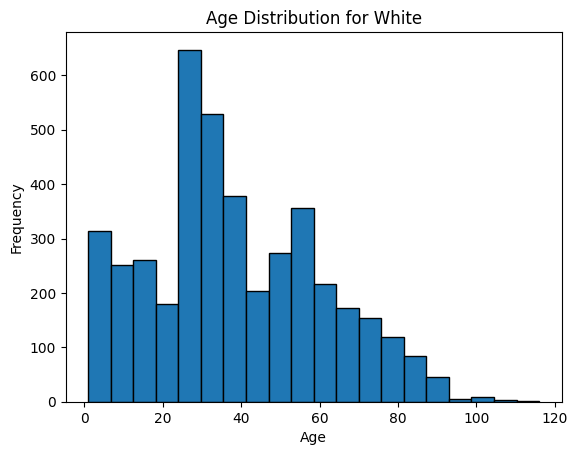

4189
4189
4189
Race: Black
Number of samples: 4189


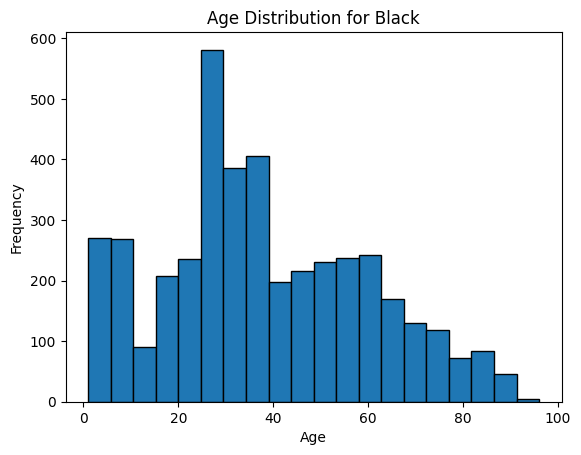

4197
4197
4197
Race: Asian
Number of samples: 4197


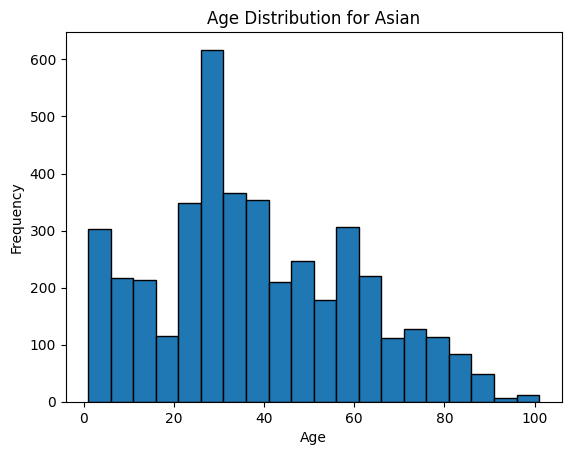

4184
4184
4184
Race: Indian
Number of samples: 4184


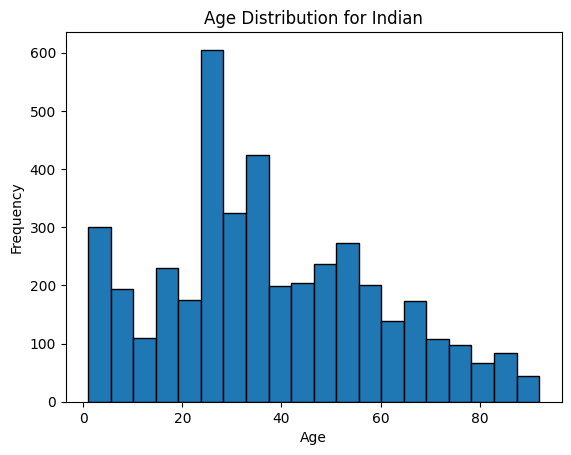

4139
4139
4139
Race: Other
Number of samples: 4139


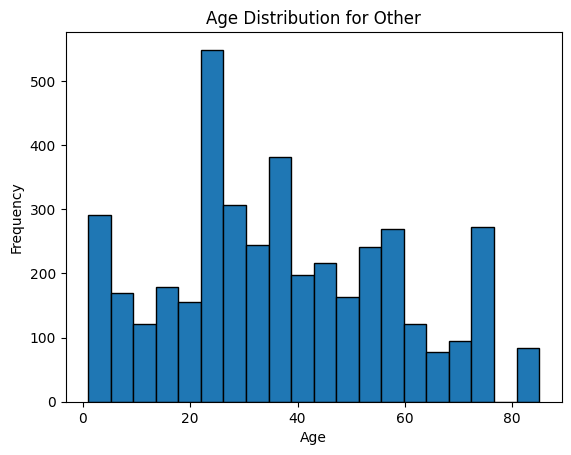

In [6]:
from sklearn.model_selection import train_test_split

# Dictionary to store datasets for each race
datasets_per_race = {}

# Split the dataset based on race
unique_races = np.unique(y_race)
for race in race_dict:
    race_indices = np.where(y_race == race)[0]
    X_race = X[race_indices]
    y_age_race = y_age[race_indices]
    y_gender_race = y_gender[race_indices]
    print(len(X_race))
    print(len(y_age_race))
    print(len(y_gender_race))
    # Split the race dataset into train and test sets
    # X_train, X_test, y_train, y_test = train_test_split(X_race, y_age_race, test_size=0.2, random_state=42)

    print(f"Race: {race_dict[race]}")
    print(f"Number of samples: {len(X_race)}")

    # Plot the age distribution for each race
    plt.figure()
    plt.hist(y_age_race, bins=20, edgecolor='black')
    plt.title(f"Age Distribution for {race_dict[race]}")
    plt.xlabel("Age")
    plt.ylabel("Frequency")
    plt.show()

    datasets_per_race[race_dict[race]] = {'X': X_race, 'y': y_age_race, 'gender': y_gender_race}

In [6]:
input_shape = (128,128,1)

In [7]:
inputs = Input((input_shape))

conv_1 = Conv2D(32, kernel_size=(3,3), activation='relu')(inputs)
maxp_1 = MaxPooling2D(pool_size=(2,2))(conv_1)

conv_2 = Conv2D(32, kernel_size=(3,3), activation='relu')(maxp_1)
maxp_2 = MaxPooling2D(pool_size=(2,2))(conv_2)

conv_3 = Conv2D(32, kernel_size=(3,3), activation='relu')(maxp_2)
maxp_3 = MaxPooling2D(pool_size=(2,2))(conv_3)

conv_4 = Conv2D(32, kernel_size=(3,3), activation='relu')(maxp_3)
maxp_4 = MaxPooling2D(pool_size=(2,2))(conv_4)

flatten = Flatten()(maxp_4)

# Fully connected layers
# dense_1 = Dense(256, activation = 'relu')(flatten)
dense_2 = Dense(256, activation = 'relu')(flatten)
# dense_3 = Dense(256, activation = 'relu')(flatten)

# dropout_1 = Dropout(0.3)(dense_1)
dropout_2 = Dropout(0.3)(dense_2)
# dropout_3 = Dropout(0.3)(dense_3)

# output_1 = Dense(1, activation = 'sigmoid', name = 'gender_out')(dropout_1)
output_2 = Dense(1, activation = 'relu', name = 'age_out')(dropout_2)
# output_3 = Dense(1, activation = 'relu', name = 'race_out')(dropout_3)

# model = Model(inputs = [inputs], outputs = [output_1, output_2, output_3])
# model = Model(inputs = [inputs], outputs = [output_1, output_2])
model = Model(inputs = [inputs], outputs = [output_2])

# model.compile(loss = ['binary_crossentropy', 'mae'], optimizer = 'adam', metrics = ['accuracy','mae'])
model.compile(loss = 'mae', optimizer = 'adam', metrics = ['mae'])

2024-05-13 15:33:04.476866: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-05-13 15:33:04.558825: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2251] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [8]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 128, 128, 1)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 12, 12, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ age_out (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 323,489 (1.23 MB)

 Trainable params: 323,489 (1.23 MB)

 Non-trainable params: 0 (0.00 B)

## training

In [9]:
history = model.fit(x = X, y = [y_age], batch_size=32, epochs = 30, validation_split = 0.2)

Epoch 1/30
523/523 ━━━━━━━━━━━━━━━━━━━━ 39s 72ms/step - loss: 20.4894 - mae: 20.4894 - val_loss: 14.6606 - val_mae: 14.6606
Epoch 2/30
523/523 ━━━━━━━━━━━━━━━━━━━━ 38s 72ms/step - loss: 14.7633 - mae: 14.7633 - val_loss: 12.0244 - val_mae: 12.0244
Epoch 3/30
523/523 ━━━━━━━━━━━━━━━━━━━━ 37s 71ms/step - loss: 12.2433 - mae: 12.2433 - val_loss: 10.6465 - val_mae: 10.6465
Epoch 4/30
523/523 ━━━━━━━━━━━━━━━━━━━━ 38s 72ms/step - loss: 11.1732 - mae: 11.1732 - val_loss: 9.5705 - val_mae: 9.5705
Epoch 5/30
523/523 ━━━━━━━━━━━━━━━━━━━━ 37s 72ms/step - loss: 10.0091 - mae: 10.0091 - val_loss: 9.2156 - val_mae: 9.2156
Epoch 6/30
523/523 ━━━━━━━━━━━━━━━━━━━━ 37s 72ms/step - loss: 9.1142 - mae: 9.1142 - val_loss: 9.3244 - val_mae: 9.3244
Epoch 7/30
523/523 ━━━━━━━━━━━━━━━━━━━━ 38s 72ms/step - loss: 8.3123 - mae: 8.3123 - val_loss: 8.7869 - val_mae: 8.7869
Epoch 8/30
523/523 ━━━━━━━━━━━━━━━━━━━━ 38s 73ms/step - loss: 7.9068 - mae: 7.9068 - val_loss: 8.5712 - val_mae: 8.5712
Epoch 9/30
523/523 ━━━━━

In [10]:
# # Plot results for gender
# acc = history.history['gender_out_accuracy']
# val_acc = history.history['val_gender_out_accuracy']
# epochs = range(len(acc))

# plt.plot(epochs, acc, 'b', label = 'Training accuracy')
# plt.plot(epochs, val_acc, 'r', label = 'Validation accuracy')
# plt.title('Accuracy graph')
# plt.legend()
# plt.figure()

# loss = history.history['loss']
# val_loss = history.history['val_loss']
# epochs = range(len(acc))

# plt.plot(epochs, loss, 'b', label = 'Training loss')
# plt.plot(epochs, val_loss, 'r', label = 'Validation loss')
# plt.title('Loss graph (gender)')
# plt.legend()
# plt.figure()

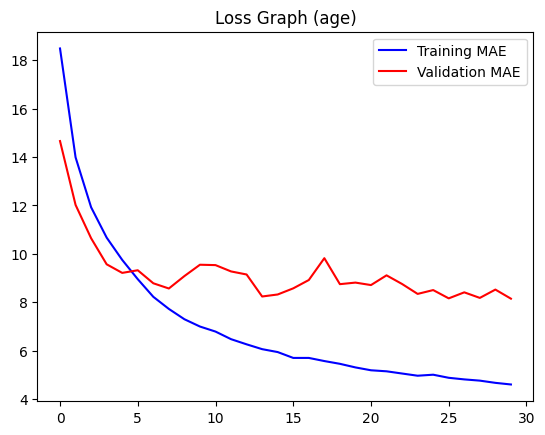

In [13]:
# Plot results for age
loss = history.history['mae']
val_loss = history.history['val_mae']
epochs = range(len(loss))

plt.plot(epochs, loss, 'b', label='Training MAE')
plt.plot(epochs, val_loss, 'r', label='Validation MAE')
plt.title('Loss Graph (age)')
plt.legend()
plt.show()

In [14]:
model.save('rebalanced.h5')